In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Balanced Tree Clothing 

In [181]:
df=pd.read_csv(r":\Users\Downloads\product_details.csv")
df_sales=pd.read_csv(r"C:\Users\\Downloads\sales.csv")
df_hr=pd.read_csv(r":\Users\Downloads\product_hierarchy.csv")

###  1.High Level Sales Analysis


In [188]:
df.columns

Index(['Unnamed: 0', 'product_id', 'price', 'product_name', 'category_id',
       'segment_id', 'style_id', 'category_name', 'segment_name',
       'style_name'],
      dtype='object')

In [189]:
df_sales.columns

Index(['Unnamed: 0', 'prod_id', 'qty', 'price', 'discount', 'member', 'txn_id',
       'start_txn_time'],
      dtype='object')

In [190]:
df_hr.columns

Index(['Unnamed: 0', 'id', 'parent_id', 'level_text', 'level_name'], dtype='object')

In [6]:
new = pd.merge(df_sales, df, left_on='prod_id', right_on='product_id', how='inner')

merged_df=pd.DataFrame(new)

In [7]:
merged_df.head()

,Unnamed: 0_x,prod_id,qty,price_x,discount,member,txn_id,start_txn_time,Unnamed: 0_y,product_id,price_y,product_name,category_id,segment_id,style_id,category_name,segment_name,style_name
0,0,c4a632,4,13,17,t,54f307,2021-02-13 01:59:43.296,0,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
1,4,c4a632,5,13,21,t,26cc98,2021-01-19 01:39:00.3456,0,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
2,9,c4a632,1,13,21,f,ef648d,2021-01-27 02:18:17.1648,0,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
3,16,c4a632,2,13,23,t,fba96f,2021-03-03 00:32:56.0544,0,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized
4,21,c4a632,5,13,11,t,4e9268,2021-01-23 14:18:54.0576,0,c4a632,13,Navy Oversized Jeans - Womens,1,3,7,Womens,Jeans,Navy Oversized


In [193]:
merged_df.columns

Index(['Unnamed: 0_x', 'prod_id', 'qty', 'price_x', 'discount', 'member',
       'txn_id', 'start_txn_time', 'Unnamed: 0_y', 'product_id', 'price_y',
       'product_name', 'category_id', 'segment_id', 'style_id',
       'category_name', 'segment_name', 'style_name'],
      dtype='object')

## 1)What was the total quantity sold for all products?


In [194]:
merged_df['qty'].sum()

45216

## Report
Total Quantity Sold for All Products is 45216

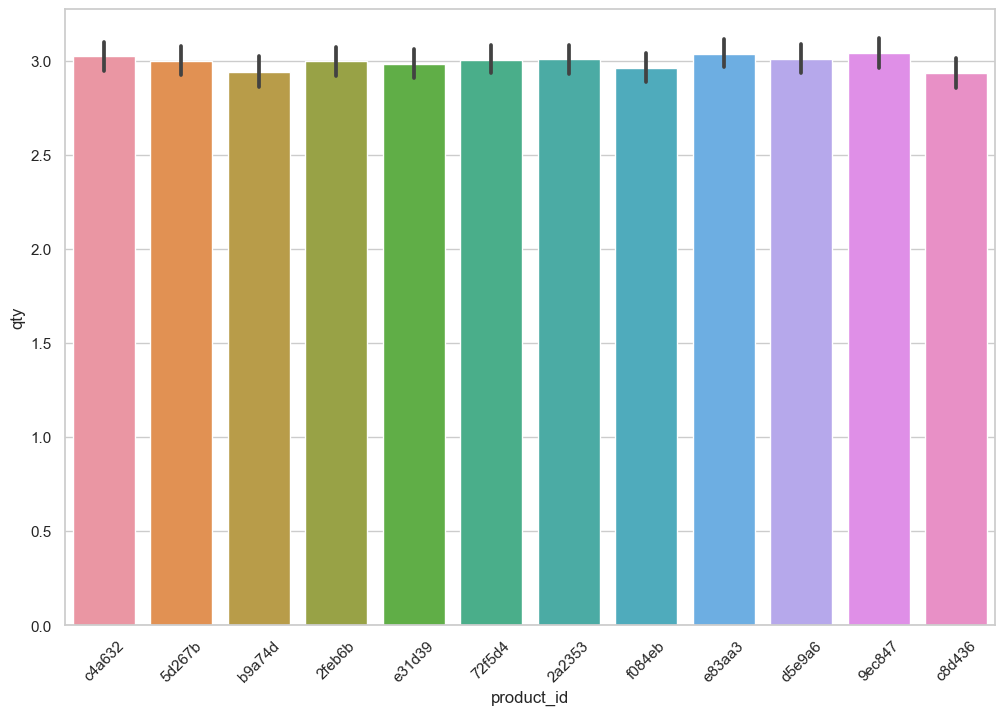

In [195]:
plt.figure(figsize=(12, 8))  

sns.barplot(x='product_id', y='qty', data=merged_df)

plt.xticks(rotation=45)

plt.show()

In [196]:
merged_df.groupby('product_id')['qty'].sum()

product_id
2a2353    3819
2feb6b    3770
5d267b    3800
72f5d4    3757
9ec847    3876
b9a74d    3655
c4a632    3856
c8d436    3646
d5e9a6    3752
e31d39    3707
e83aa3    3786
f084eb    3792
Name: qty, dtype: int64

## 2) What is the total generated revenue for all products before discounts?

In [197]:
merged_df['total_revenue'] = (merged_df['qty'] * merged_df['price_x']).sum()

In [198]:
sales = pd.merge(df_sales, df[['product_id', 'price']], left_on='prod_id', right_on='product_id', how='left')
df_sales['revenue'] = df_sales['qty'] * df_sales['price']
total_revenue = df_sales['revenue'].sum()
print(f"Total generated revenue for all products before discounts: {total_revenue}")

Total generated revenue for all products before discounts: 1289453


In [199]:
total_revenue

1289453

## Report
Total Revenue for All Products before Discounts is 1289453

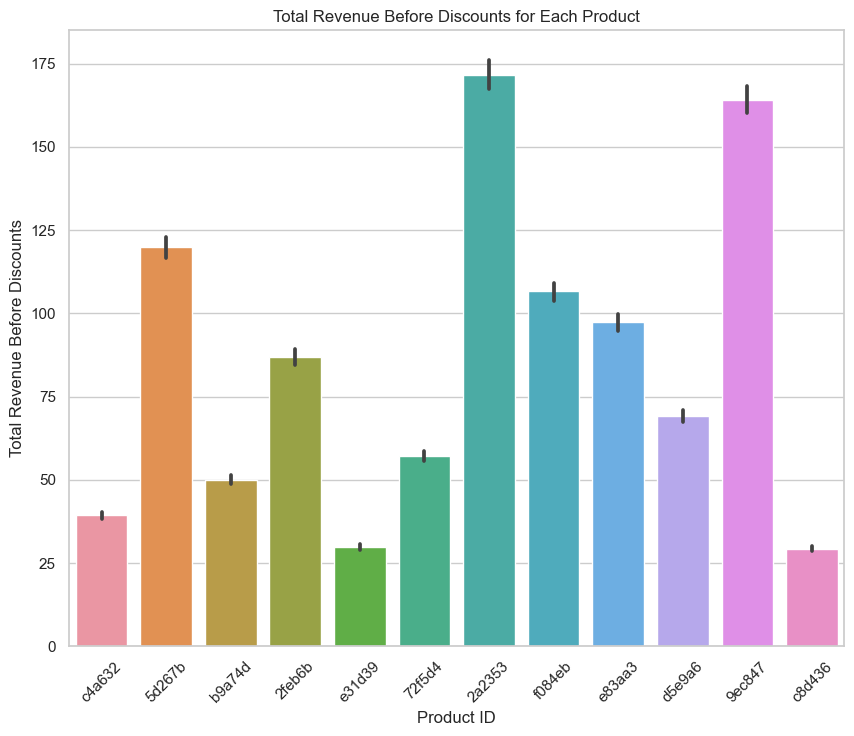

In [200]:
plt.figure(figsize=(10, 8)) 

merged_df['total_revenue_before_discounts'] = merged_df['qty'] * merged_df['price_y']

sns.barplot(x='product_id', y='total_revenue_before_discounts', data=merged_df)

plt.xticks(rotation=45)
plt.xlabel('Product ID')
plt.ylabel('Total Revenue Before Discounts')
plt.title('Total Revenue Before Discounts for Each Product')

plt.show()

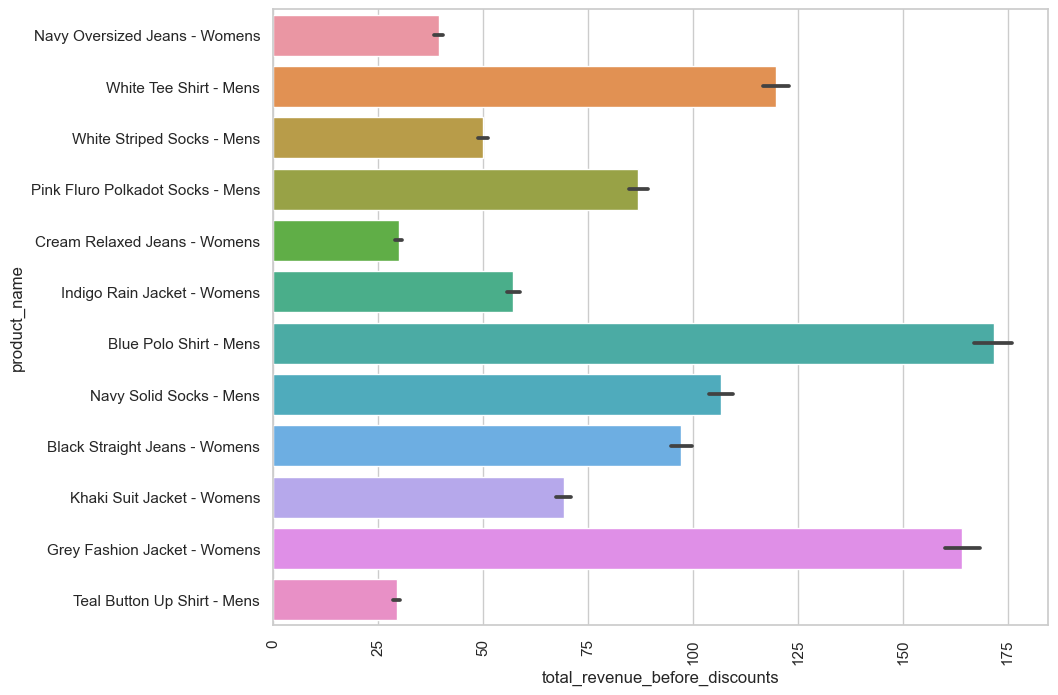

In [201]:
plt.figure(figsize=(10, 8))
sns.barplot(x='total_revenue_before_discounts', y='product_name', data=merged_df)
plt.xticks(rotation=90)

plt.show()

## 3) What was the total discount amount for all products?


In [202]:
total = merged_df['price_x']*merged_df['qty']*merged_df['discount']

In [203]:
total.sum()

15622914

##  Report
total discount amount for all products is 15622914

In [204]:
t=merged_df.groupby('product_id')[['price_x','qty','discount']].sum()

In [205]:
t

,price_x,qty,discount
product_id,,,
2a2353,72276,3819,15553
2feb6b,36482,3770,14946
5d267b,50720,3800,15487
72f5d4,23750,3757,15283
9ec847,68850,3876,15500
b9a74d,21131,3655,14873
c4a632,16562,3856,15418
c8d436,12420,3646,15003
d5e9a6,28681,3752,14669


# `Transaction Analysis`

## 1) How many unique transactions were there?

In [206]:
merged_df['txn_id'].nunique()

2500

## Report
There were 2500 unique transactions.

## 2) What is the average unique products purchased in each transaction?

In [207]:
tp= merged_df.groupby('txn_id')['prod_id'].nunique()

avg_unique_products_per_transaction =tp.mean()

print("The average number of unique products purchased per transaction is", avg_unique_products_per_transaction)

The average number of unique products purchased per transaction is 6.038


In [208]:
merged_df.groupby('txn_id')['prod_id'].nunique().sum()

15095

In [209]:
tp.size

2500

In [210]:
15095/2500

6.038

## Report
The average number of unique products purchased per transaction is 6.038

## 3) What are the 25th, 50th and 75th percentile values for the revenue per transaction?

In [211]:
revenue_percentiles = df_sales.groupby('txn_id')['revenue'].sum().quantile([0.25, 0.5, 0.75])
print("25th percentile:", revenue_percentiles[0.25])
print("50th percentile:", revenue_percentiles[0.5])
print("75th percentile:", revenue_percentiles[0.75])

25th percentile: 375.75
50th percentile: 509.5
75th percentile: 647.0


## Report
25th Percentile (Q1): $375.75

This means that 25% of the transactions have a revenue per transaction of 375.75 or lower.
50th Percentile (Median): $509.5

Also known as the median, this is the middle value of the dataset. Half of the transactions have a revenue per transaction of 509.5 or lower, and the other half have a revenue of 509.5 or higher.
75th Percentile (Q3): 647.0

This means that 75% of the transactions have a revenue per transaction of $647.0 or lower.

## 4) What is the average discount value per transaction?

In [212]:
average_discount = merged_df['discount'].mean()

print(average_discount)

12.10334547863531


## Report
Average Discount Value: The average discount value per transaction across all transactions is approximately 12.10.

## 5) What is the percentage split of all transactions for members vs non-members

In [213]:
member_split = merged_df['member'].value_counts(normalize=True) * 100

print(member_split)

member
t    60.026499
f    39.973501
Name: proportion, dtype: float64


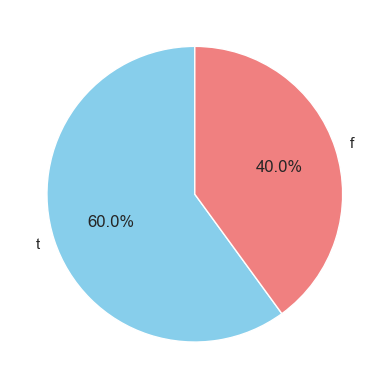

In [214]:
plt.pie(member_split, labels=member_split.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.show()

## Report
The percentage split of transactions indicates that approximately 60.03% are associated with members ('t') and 39.97% with non-members ('f')

## 6)What is the average revenue for member transactions and non-member transactions?

In [215]:
df_sales['total_revenue_before_discounts'] = df_sales['qty'] * df_sales['price']

total_revenue_by_member = df_sales.groupby('member')['total_revenue_before_discounts'].sum().reset_index()
print(total_revenue_by_member)

  member  total_revenue_before_discounts
0      f                          512469
1      t                          776984


## Report
Members ('t') contribute significantly more to the total revenue before discounts compared to non-members ('f').
The difference in total revenue suggests that members, on average, make larger or more frequent purchases, contributing to a higher overall revenue.

# `Product Analysis`

## 1) What are the top 3 products by total revenue before discount?

In [216]:
merged_df['total_revenue_before_discount'] = merged_df['qty'] * merged_df['price_y']

top_products = merged_df.groupby('product_id')['total_revenue_before_discount'].sum()

top3_products = top_products.nlargest(3)

print(top3_products)


product_id
2a2353    217683
9ec847    209304
5d267b    152000
Name: total_revenue_before_discount, dtype: int64


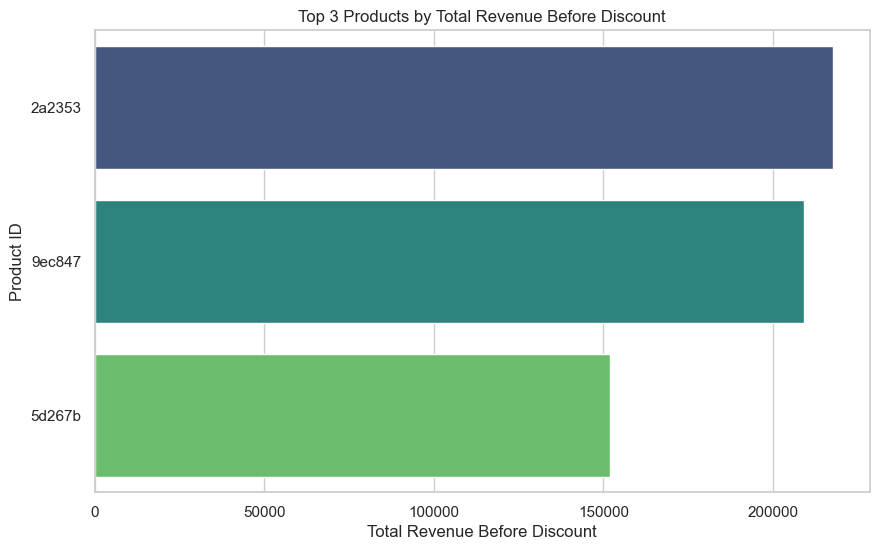

In [217]:
top3_products = top_products.nlargest(3)

top3_df = top3_products.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue_before_discount', y='product_id', data=top3_df, palette='viridis')
plt.xlabel('Total Revenue Before Discount')
plt.ylabel('Product ID')
plt.title('Top 3 Products by Total Revenue Before Discount')
plt.show()

## 2) What is the total quantity, revenue and discount for each segment?

In [218]:
segment_summary = merged_df.groupby(['segment_id', 'segment_name']).agg({
    'qty': 'sum',
    'total_revenue_before_discount': 'sum',
    'discount': 'sum'
}).reset_index()

pd.DataFrame(segment_summary)

,segment_id,segment_name,qty,total_revenue_before_discount,discount
0,3,Jeans,11349,208350,45740
1,4,Jacket,11385,366983,45452
2,5,Shirt,11265,406143,46043
3,6,Socks,11217,307977,45465


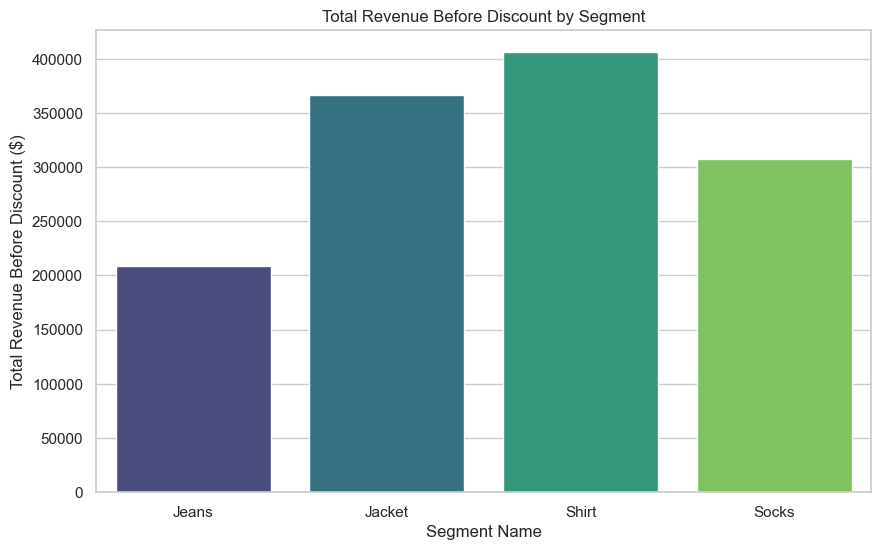

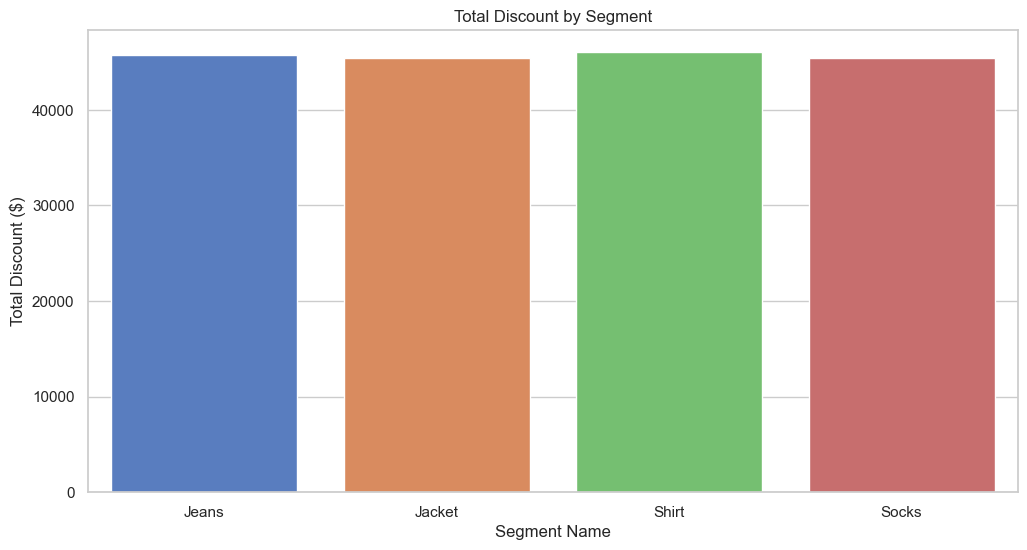

In [219]:
sns.set(style="whitegrid")

#  a bar plot for total revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='segment_name', y='total_revenue_before_discount', data=segment_summary, palette='viridis')
plt.title('Total Revenue Before Discount by Segment')
plt.xlabel('Segment Name')
plt.ylabel('Total Revenue Before Discount ($)')
plt.show()

#  a bar plot for total discount
plt.figure(figsize=(12, 6))
sns.barplot(x='segment_name', y='discount', data=segment_summary, palette='muted')
plt.title('Total Discount by Segment')
plt.xlabel('Segment Name')
plt.ylabel('Total Discount ($)')
plt.show()

## Report
Jeans Segment:

Total Quantity: 11,349
Total Revenue Before Discount: $208,350
Total Discount: $45,740

Jacket Segment:

Total Quantity: 11,385
Total Revenue Before Discount: $366,983
Total Discount: $45,452

Shirt Segment:

Total Quantity: 11,265
Total Revenue Before Discount: $406,143
Total Discount: $46,043

Socks Segment:

Total Quantity: 11,217
Total Revenue Before Discount: $307,977
Total Discount: $45,465

## 3)What is the top selling product for each segment?

In [220]:
product_sales_by_segment = merged_df.groupby(['segment_id', 'category_name','product_id','segment_name'])['qty'].sum()

top_selling_products_index = product_sales_by_segment.groupby('segment_id').idxmax()

top_selling_products = product_sales_by_segment.loc[top_selling_products_index].reset_index()

pd.DataFrame(top_selling_products)


,segment_id,category_name,product_id,segment_name,qty
0,3,Womens,c4a632,Jeans,3856
1,4,Womens,9ec847,Jacket,3876
2,5,Mens,2a2353,Shirt,3819
3,6,Mens,f084eb,Socks,3792


## Report 
While the top-selling products in the Women category have slightly higher individual quantities compared to those in the Men category, the overall difference in the total quantity of these top-selling items across all segments is minimal. In essence, the segments exhibit relatively similar levels of demand for their respective leading products, with subtle variations in the quantities sold.

## 4) What is the total quantity, revenue and discount for each category?


In [221]:
category_summary = merged_df.groupby('category_name').agg({
    'qty': 'sum',
    'total_revenue_before_discount': 'sum',
    'discount': 'sum'
}).reset_index()

pd.DataFrame(category_summary)


,category_name,qty,total_revenue_before_discount,discount
0,Mens,22482,714120,91508
1,Womens,22734,575333,91192


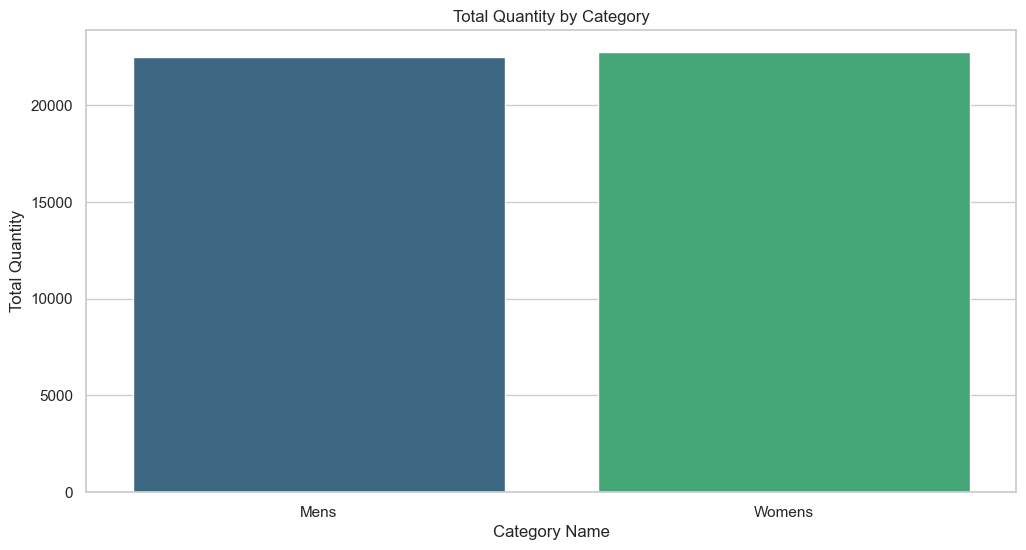

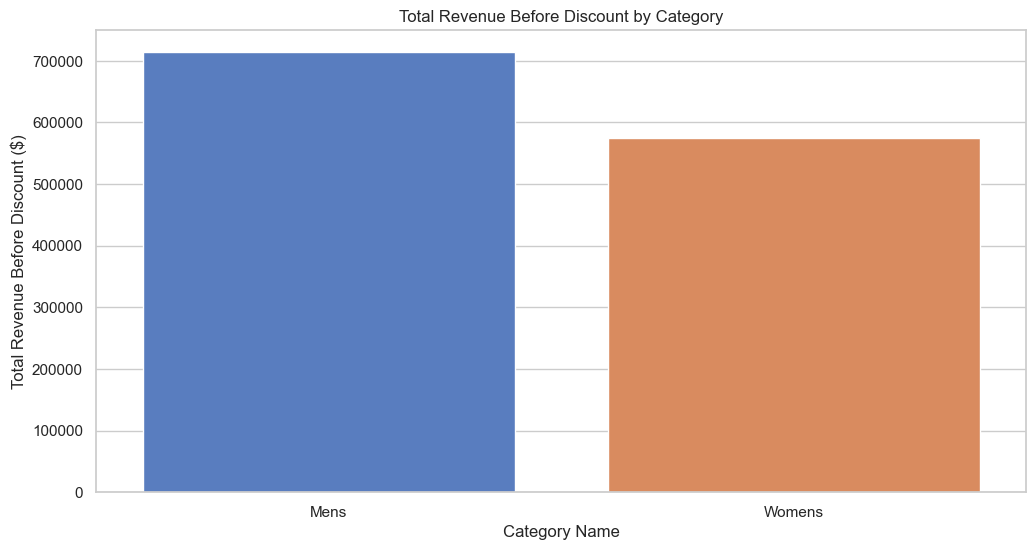

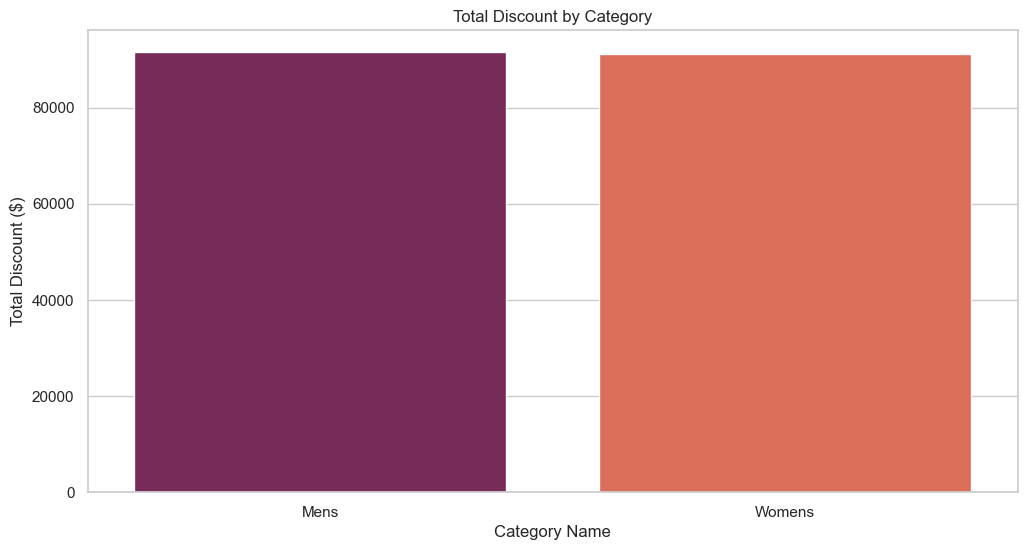

In [222]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='category_name', y='qty', data=category_summary, palette='viridis')
plt.title('Total Quantity by Category')
plt.xlabel('Category Name')
plt.ylabel('Total Quantity')
plt.show()

# for total revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='category_name', y='total_revenue_before_discount', data=category_summary, palette='muted')
plt.title('Total Revenue Before Discount by Category')
plt.xlabel('Category Name')
plt.ylabel('Total Revenue Before Discount ($)')
plt.show()

# for total discount
plt.figure(figsize=(12, 6))
sns.barplot(x='category_name', y='discount', data=category_summary, palette='rocket')
plt.title('Total Discount by Category')
plt.xlabel('Category Name')
plt.ylabel('Total Discount ($)')
plt.show()

## Report
Despite similar quantities sold, the Mens category generates higher revenue (714,120) compared to the Womens category ($575,333).
The Mens category also offers a slightly higher total discount (91,508) compared to the Womens category (91,192).

## 5) What is the top selling product for each category?


In [223]:
product_sales_by_category = merged_df.groupby(['category_name', 'product_id'])['qty'].sum()

top_selling_products_index = product_sales_by_category.groupby('category_name').idxmax()

top_selling_products = product_sales_by_category.loc[top_selling_products_index].reset_index()

pd.DataFrame(top_selling_products)


,category_name,product_id,qty
0,Mens,2a2353,3819
1,Womens,9ec847,3876


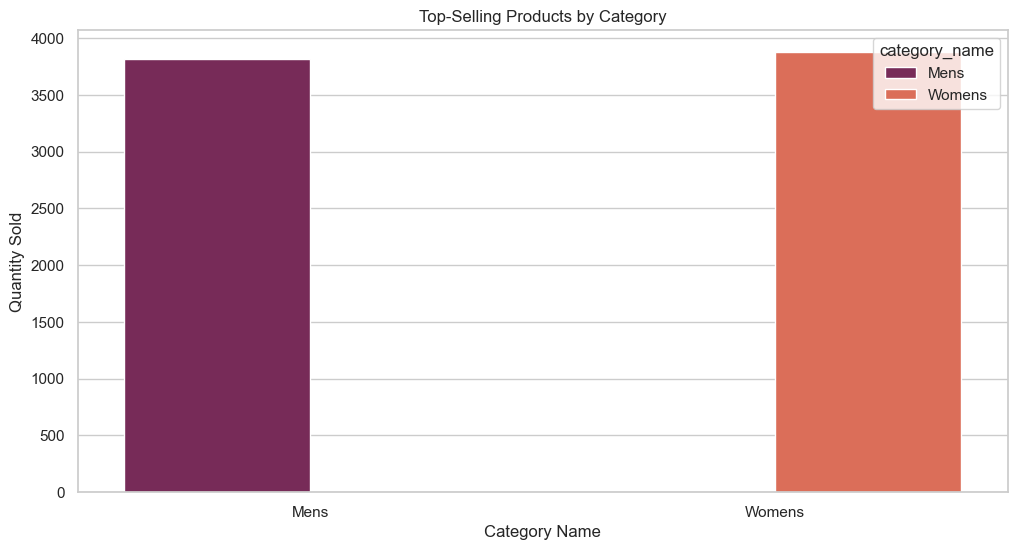

In [224]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='category_name', y='qty', data=top_selling_products, hue='category_name', palette='rocket')
plt.title('Top-Selling Products by Category')
plt.xlabel('Category Name')
plt.ylabel('Quantity Sold')
plt.show()

## Report
Mens Category:

Top-Selling Product: Product with ID 2a2353
Quantity Sold: 3,819 units
Additional Analysis: The product with ID 2a2353 is the most popular in the Mens category, contributing significantly to the overall sales volume.


Womens Category:

Top-Selling Product: Product with ID 9ec847
Quantity Sold: 3,876 units
Additional Analysis: The product with ID 9ec847 stands out as the top-seller in the Womens category, indicating strong demand for this particular item.
Insights:

Despite potential differences in product characteristics or marketing strategies, both categories have a clear top-selling product.

## 6) What is the percentage split of revenue by product for each segment?

In [225]:
product_revenue_by_segment = merged_df.groupby(['segment_id', 'product_id','category_name','product_name'])['total_revenue_before_discount'].sum()

total_revenue_by_segment = merged_df.groupby('segment_id')['total_revenue_before_discount'].sum()

percentage_split = (product_revenue_by_segment / total_revenue_by_segment * 100).reset_index()

pd.DataFrame(percentage_split)


,segment_id,product_id,category_name,product_name,total_revenue_before_discount
0,3,c4a632,Womens,Navy Oversized Jeans - Womens,24.059515
1,3,e31d39,Womens,Cream Relaxed Jeans - Womens,17.792177
2,3,e83aa3,Womens,Black Straight Jeans - Womens,58.148308
3,4,72f5d4,Womens,Indigo Rain Jacket - Womens,19.451310
4,4,9ec847,Womens,Grey Fashion Jacket - Womens,57.033705
5,4,d5e9a6,Womens,Khaki Suit Jacket - Womens,23.514986
6,5,2a2353,Mens,Blue Polo Shirt - Mens,53.597624
7,5,5d267b,Mens,White Tee Shirt - Mens,37.425242
8,5,c8d436,Mens,Teal Button Up Shirt - Mens,8.977134
9,6,2feb6b,Mens,Pink Fluro Polkadot Socks - Mens,35.499404


In [226]:
percentage_split.iloc[6:11]

,segment_id,product_id,category_name,product_name,total_revenue_before_discount
6,5,2a2353,Mens,Blue Polo Shirt - Mens,53.597624
7,5,5d267b,Mens,White Tee Shirt - Mens,37.425242
8,5,c8d436,Mens,Teal Button Up Shirt - Mens,8.977134
9,6,2feb6b,Mens,Pink Fluro Polkadot Socks - Mens,35.499404
10,6,b9a74d,Mens,White Striped Socks - Mens,20.175208


In [227]:
wd=percentage_split.loc[0:5,('category_name','product_name','total_revenue_before_discount')]

In [228]:
wd

,category_name,product_name,total_revenue_before_discount
0,Womens,Navy Oversized Jeans - Womens,24.059515
1,Womens,Cream Relaxed Jeans - Womens,17.792177
2,Womens,Black Straight Jeans - Womens,58.148308
3,Womens,Indigo Rain Jacket - Womens,19.451310
4,Womens,Grey Fashion Jacket - Womens,57.033705
5,Womens,Khaki Suit Jacket - Womens,23.514986


In [229]:
wd['product_name']=wd['product_name'].str.replace('Womens',' ')

In [230]:
x=wd['total_revenue_before_discount']
y=wd['product_name']

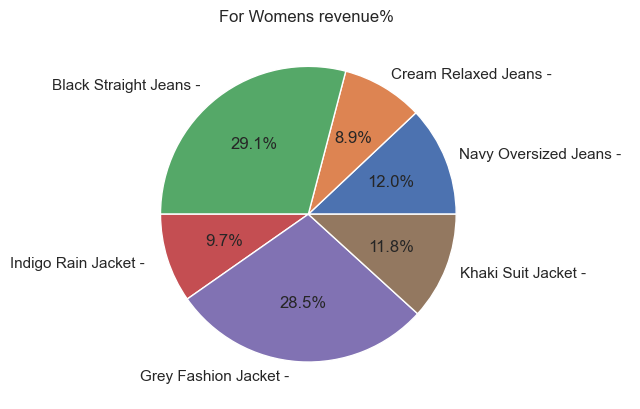

In [231]:
plt.pie(x,labels=y,autopct='%0.1f%%')
plt.title('For Womens revenue% ')
plt.show()

In [232]:
x=['53.597624','37.425242','8.977134','35.499404','20.175208']
y=['Blue Polo Shirt','White Tee Shirt','Teal Button Up Shirt','Pink Fluro Polkadot Socks','White Striped Socks']

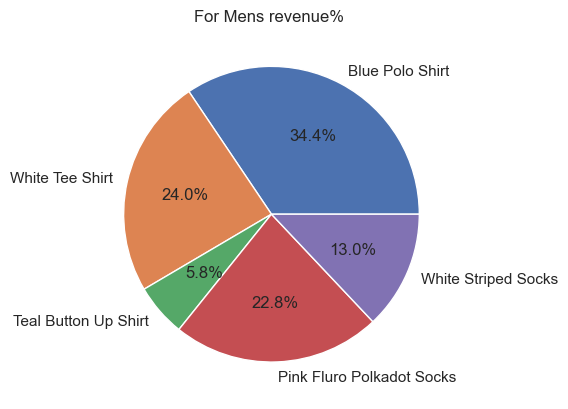

In [233]:
plt.pie(x,labels=y,autopct='%0.1f%%')
plt.title('For Mens revenue% ')
plt.show()

## Report 
The Women's segment in the Jeans and Jacket categories is characterized by higher revenue-generating products.
The Men's segment dominates the Shirt and Socks categories with notable revenue contributors.

## 7) What is the percentage split of revenue by segment for each category?

In [234]:
segment_revenue_by_category = merged_df.groupby(['category_name', 'segment_id'])['total_revenue_before_discount'].sum()

total_revenue_by_category = merged_df.groupby('category_name')['total_revenue_before_discount'].sum()

percentage_split_by_segment = (segment_revenue_by_category / total_revenue_by_category * 100).reset_index()

pd.DataFrame(percentage_split_by_segment)


,category_name,segment_id,total_revenue_before_discount
0,Mens,5,56.873215
1,Mens,6,43.126785
2,Womens,3,36.213810
3,Womens,4,63.786190


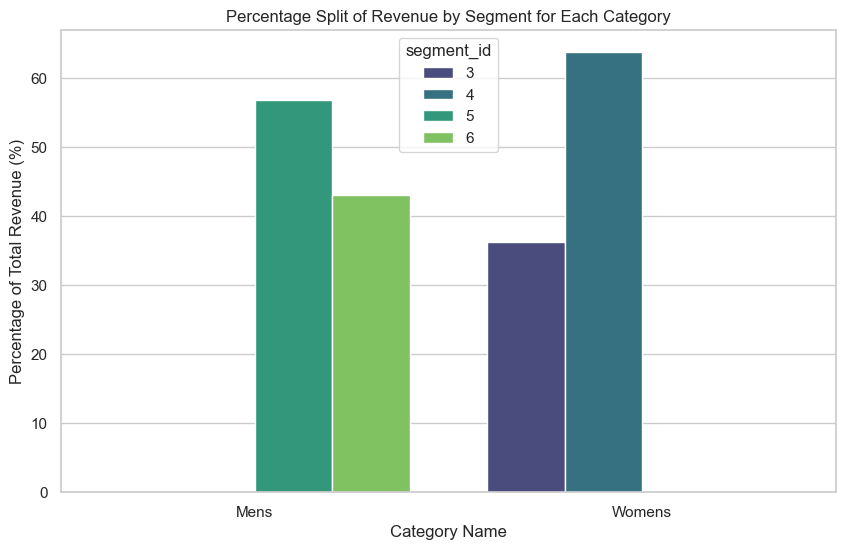

In [235]:
sns.set(style="whitegrid")

plt.figure(figsize=(10 ,6))
sns.barplot(x='category_name', y='total_revenue_before_discount', hue='segment_id', data=percentage_split_by_segment, palette='viridis')
plt.title('Percentage Split of Revenue by Segment for Each Category')
plt.xlabel('Category Name')
plt.ylabel('Percentage of Total Revenue (%)')
plt.show()


## Report
> Mens Category:

Segment 5 (Shirt):

Percentage of Total Revenue: 56.87%
Additional Analysis: The Shirt segment (Segment 5) contributes the majority of the revenue in the Mens category.
Segment 6 (Socks):

Percentage of Total Revenue: 43.13%
Additional Analysis: The Socks segment (Segment 6) also plays a significant role in generating revenue for the Mens category


> Womens Category:

Segment 3 (Jeans):

Percentage of Total Revenue: 36.21%
Additional Analysis: The Jeans segment (Segment 3) is a notable contributor to the revenue in the Womens category.
Segment 4 (Jacket):

Percentage of Total Revenue: 63.79%
Additional Analysis: The Jacket segment (Segment 4) dominates the revenue distribution in the Womens category.


In the Mens category, the revenue is split predominantly between the Shirt and Socks segments.
In the Womens category, the Jacket segment is the leading revenue contributor, followed by the Jeans segment.

## 8) What is the percentage split of total revenue by category?


In [236]:
total_revenue_by_category = merged_df.groupby('category_name')['total_revenue_before_discount'].sum()

percentage_split_by_category = (total_revenue_by_category / total_revenue_by_category.sum() * 100).reset_index()

pd.DataFrame(percentage_split_by_category)


,category_name,total_revenue_before_discount
0,Mens,55.381623
1,Womens,44.618377


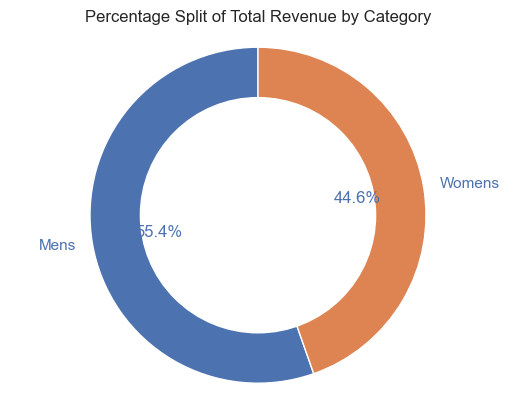

In [237]:
labels = percentage_split_by_category['category_name']
sizes = percentage_split_by_category['total_revenue_before_discount']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), textprops=dict(color="b"))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal') 
plt.title('Percentage Split of Total Revenue by Category')
plt.show()

## 9) What is the total transaction “penetration” for each product? (hint: penetration = number of transactions where at least one quantity of a product was purchased divided by total number of transactions)


In [238]:
transactions_with_product = merged_df[merged_df['qty'] > 0]['txn_id'].nunique()

total_transactions = merged_df['txn_id'].nunique()

penetration_by_product =merged_df.groupby('product_name')['txn_id'].nunique() / total_transactions

pd.DataFrame(penetration_by_product)


,txn_id
product_name,
Black Straight Jeans - Womens,0.4984
Blue Polo Shirt - Mens,0.5072
Cream Relaxed Jeans - Womens,0.4972
Grey Fashion Jacket - Womens,0.5100
Indigo Rain Jacket - Womens,0.5000
Khaki Suit Jacket - Womens,0.4988
Navy Oversized Jeans - Womens,0.5096
Navy Solid Socks - Mens,0.5124
Pink Fluro Polkadot Socks - Mens,0.5032


In [239]:
penetration_percentage = penetration_by_product * 100

pd.DataFrame(penetration_percentage)


,txn_id
product_name,
Black Straight Jeans - Womens,49.84
Blue Polo Shirt - Mens,50.72
Cream Relaxed Jeans - Womens,49.72
Grey Fashion Jacket - Womens,51.00
Indigo Rain Jacket - Womens,50.00
Khaki Suit Jacket - Womens,49.88
Navy Oversized Jeans - Womens,50.96
Navy Solid Socks - Mens,51.24
Pink Fluro Polkadot Socks - Mens,50.32


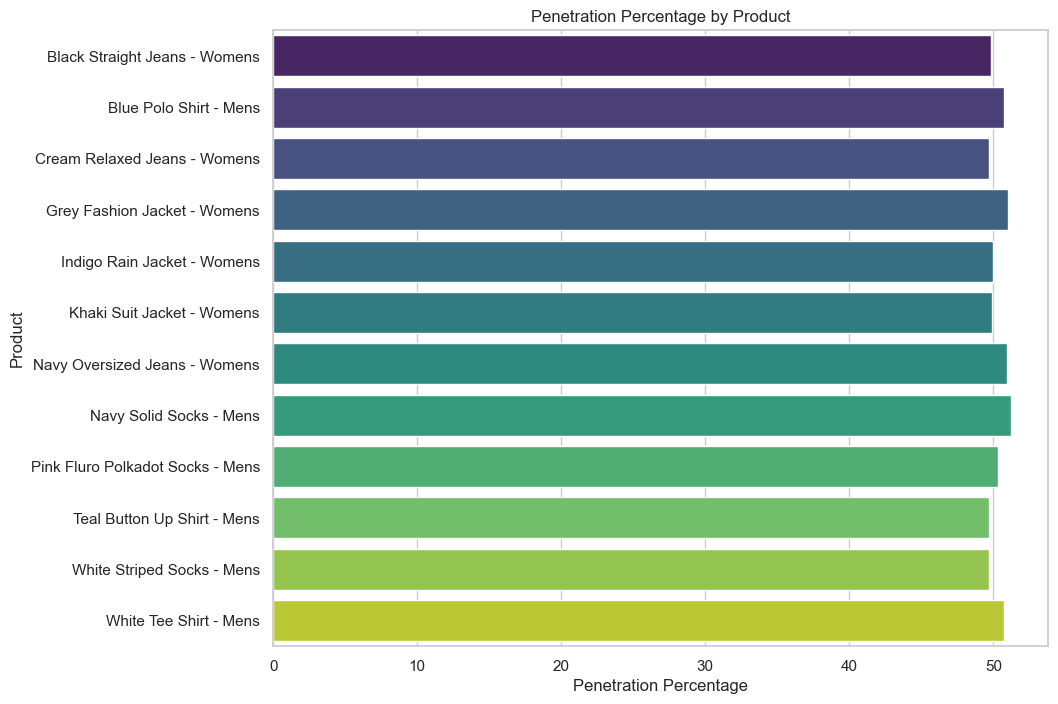

In [240]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(x=penetration_percentage.values, y=penetration_percentage.index, palette='viridis')
plt.title('Penetration Percentage by Product')
plt.xlabel('Penetration Percentage')
plt.ylabel('Product')
plt.show()

## Report 
The penetration percentages for the products range from approximately 49.68% to 51.24%.
Most products have a penetration percentage close to 50%, indicating a relatively balanced distribution of purchases across the products.

## 10) What is the most common combination of at least 1 quantity of any 3 products in a single transaction?


In [241]:
import itertools
# Filter transactions with at least 1 quantity
df_filtered = merged_df[merged_df['qty'] > 0]

# Group by transaction and create a list of products in each transaction
transactions = df_filtered.groupby('txn_id')['product_name'].apply(list)

# Generate all possible combinations of 3 products
all_combinations = list(itertools.combinations(set(df_filtered['product_name']), 3))

# Count occurrences of each combination in transactions
combination_counts = [transactions.apply(lambda x: set(combination).issubset(x)).sum() for combination in all_combinations]

# Find the most common combination
most_common_combination = all_combinations[combination_counts.index(max(combination_counts))]

# Display the result
print("Most Common Combination of at Least 1 Quantity of Any 3 Products:")
pd.DataFrame(most_common_combination)


Most Common Combination of at Least 1 Quantity of Any 3 Products:


,0
0,Teal Button Up Shirt - Mens
1,Grey Fashion Jacket - Womens
2,White Tee Shirt - Mens


## Report
In summary,C(12,3)=220 is a theoretical count of all possible combinations

 but the count of 352 times is based on the actual data , indicating how often that specific combination was observed in the transactions.